<a href="https://colab.research.google.com/github/vaishnaviravi506/Quantium-Data-Analytics-Virtual-Experience-Program/blob/main/Quantium_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load required libraries and datasets

In [ ]:
# Data Wrangling
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Date Functionality
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Statistical analysis
from scipy.stats import ttest_ind


# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Data_transaction = pd.read_csv("/content/QVI_transaction_data.csv")
Data_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


#To Check Missing Data

In [ ]:
Data_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [ ]:
# Look for duplicated TXN_ID

Data_transaction[Data_transaction.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,43351,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,43315,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [ ]:
# Select the first duplicated TXN_ID

Data_transaction.loc[Data_transaction['TXN_ID'] == 48887, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,43605,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.60



#Categorise Numeric and Categorical Data

In [ ]:
Data_transaction_numerics_only = Data_transaction.select_dtypes(include=np.number)
Data_transaction_cat = set(Data_transaction.columns) - set(Data_transaction_numerics_only)

In [ ]:
print("Numeric Columns:\n",list(Data_transaction_numerics_only))
print("Categorical Columns:\n",list(Data_transaction_cat))

Numeric Columns:
 ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES']
Categorical Columns:
 ['PROD_NAME']


#To Check Outliers and Treat them

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

Text(0, 0.5, 'Total Sales)')

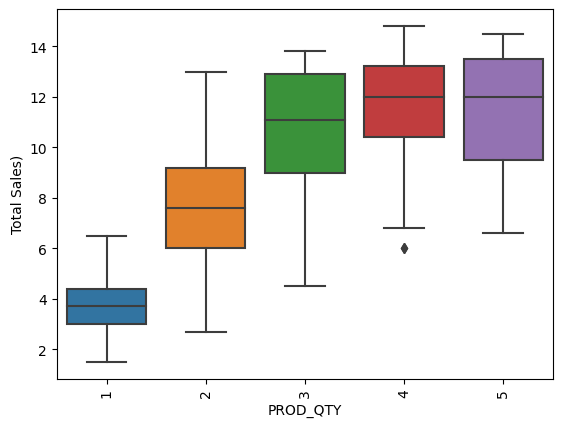

In [ ]:
df_outlier_removed=remove_outlier_IQR(Data_transaction.TOT_SALES)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=Data_transaction.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=Data_transaction.drop([ind_diff[i]])
    Data_transaction =df_final

sns.boxplot(y='TOT_SALES', x='PROD_QTY',data=Data_transaction)
plt.xticks(rotation=90)
plt.ylabel('Total Sales)')

In [ ]:
print("Shape of dataset after treating outliers:",Data_transaction.shape)

Shape of dataset after treating outliers: (264258, 8)


In [ ]:
# Convert Date column into DATE format
origin = pd.Timestamp("30/12/1899")
Data_transaction["DATE"] = Data_transaction["DATE"].apply(lambda x: origin + pd.Timedelta(days=x))
Data_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
Data_transaction['PROD_NAME'].value_counts()

Kettle Tortilla ChpsHny&Jlpno Chili 150g    3285
Kettle Mozzarella   Basil & Pesto 175g      3280
Tyrrells Crisps     Ched & Chives 165g      3264
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3260
Cobs Popd Sea Salt  Chips 110g              3259
                                            ... 
Woolworths Medium   Salsa 300g              1430
RRD Pc Sea Salt     165g                    1429
French Fries Potato Chips 175g              1418
NCC Sour Cream &    Garden Chives 175g      1416
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [ ]:
# The customer only wants insights on chips category, hence, we eliminate all the other products.
Data_transaction = Data_transaction[Data_transaction["PROD_NAME"].str.contains("Salsa")==False]
Data_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
Data_transaction['PROD_NAME'].value_counts()

Kettle Tortilla ChpsHny&Jlpno Chili 150g    3285
Kettle Mozzarella   Basil & Pesto 175g      3280
Tyrrells Crisps     Ched & Chives 165g      3264
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3260
Cobs Popd Sea Salt  Chips 110g              3259
                                            ... 
Sunbites Whlegrn    Crisps Frch/Onin 90g    1432
RRD Pc Sea Salt     165g                    1429
French Fries Potato Chips 175g              1418
NCC Sour Cream &    Garden Chives 175g      1416
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 105, dtype: int64

In [ ]:
# Extracting pack size from the Product
import re
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
Data_transaction['pack_size']=Data_transaction['PROD_NAME'].apply(lambda x: find_number(x))
Data_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


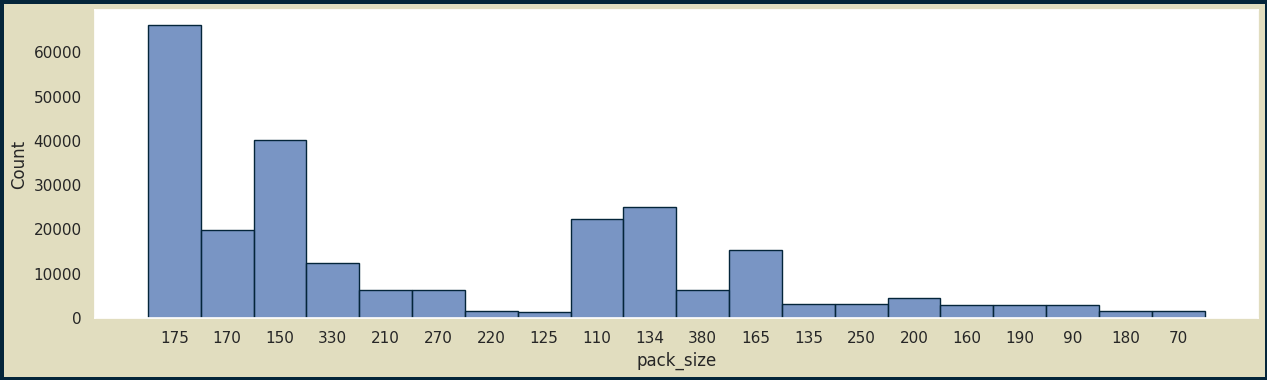

In [ ]:
# Histogram showing the number of transactions by pack size

fig = plt.figure(figsize = (15,4), linewidth=5, edgecolor="#04253a", facecolor = '#e1ddbf')

sns.set(rc = {'figure.figsize':(15,4)})
ax = sns.histplot(data=Data_transaction, x="pack_size",  edgecolor="#04253a")

ax.set_facecolor("#ffffff")

In [ ]:
# Create column for brand names
Data_transaction['Brand Name'] = Data_transaction['PROD_NAME'].str.split(' ').str[0]

In [ ]:
# Check for any duplication or similar brands
Data_transaction['Brand Name'].value_counts()

Kettle        41141
Smiths        27340
Pringles      25052
Doritos       21975
Thins         14049
RRD           11880
Infuzions     11035
WW            10320
Cobs           9669
Tostitos       9443
Twisties       9420
Tyrrells       6428
Grain          6265
Natural        6037
Cheezels       4583
CCs            4551
Red            4427
Dorito         3175
Infzns         3138
Smith          2963
Cheetos        2926
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1465
Sunbites       1432
French         1418
NCC            1416
Name: Brand Name, dtype: int64

In [ ]:
Data_transaction['Brand Name'] = Data_transaction['Brand Name'].str.replace('Red','RRD')
Data_transaction['Brand Name'] = Data_transaction['Brand Name'].str.replace('Woolworths','WW')
Data_transaction['Brand Name'] = Data_transaction['Brand Name'].str.replace('INFUZIONS','INFZNS')
Data_transaction['Brand Name'] = Data_transaction['Brand Name'].str.replace('SMITHS','SMITH')
Data_transaction['Brand Name'] = Data_transaction['Brand Name'].str.replace('SUNBITES','SNBTS')
Data_transaction['Brand Name'] = Data_transaction['Brand Name'].str.replace('DORITOS','DORITO')
Data_transaction['Brand Name'] = Data_transaction['Brand Name'].str.replace('GRNWVES','GRAIN')

In [ ]:
Data_transaction['Brand Name'].value_counts()

Kettle       41141
Smiths       27340
Pringles     25052
Doritos      21975
RRD          16307
Thins        14049
WW           11836
Infuzions    11035
Cobs          9669
Tostitos      9443
Twisties      9420
Tyrrells      6428
Grain         6265
Natural       6037
Cheezels      4583
CCs           4551
Dorito        3175
Infzns        3138
Smith         2963
Cheetos       2926
Snbts         1576
Burger        1564
GrnWves       1465
Sunbites      1432
French        1418
NCC           1416
Name: Brand Name, dtype: int64

#Examining customer data

In [ ]:
Data_customer = pd.read_csv("/content/QVI_purchase_behaviour.csv")
Data_customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


#To check for null Values in the data.

In [ ]:
Data_customer.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#Categorise Numeric and Categorical Data

In [ ]:
Data_customer_numerics_only = Data_customer.select_dtypes(include=np.number)
Data_customer_cat = set(Data_customer.columns) - set(Data_customer_numerics_only)

In [ ]:
print("Numeric Columns:\n",list(Data_customer_numerics_only))
print("Categorical Columns:\n",Data_customer_cat)

Numeric Columns:
 ['LYLTY_CARD_NBR']
Categorical Columns:
 {'PREMIUM_CUSTOMER', 'LIFESTAGE'}


In [ ]:
# Merging the two dataframes
df4 = pd.merge(Data_transaction,Data_customer)
df4

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,Brand Name,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246199,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246200,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246201,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246202,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [ ]:
# To check if some customers were not matched on by checking for nulls.
df4.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
pack_size           0
Brand Name          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(df4['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

#We have a missing date on Christmas Day. This makes sense because most retail stores are closed that day.

In [ ]:
# Create a new dataframe which contains the total sale for each date

df5 = pd.pivot_table(df4, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
df5.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [ ]:
df6 = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
df6['TOT_SALES'] = 0
len(df6)

365

In [ ]:
z = df5 + df6
z.fillna(0, inplace = True)

In [ ]:
z.index.name = 'Date'
z.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
z.head()

,Total Sales
Date,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


Text(0, 0.5, 'Total Sales')

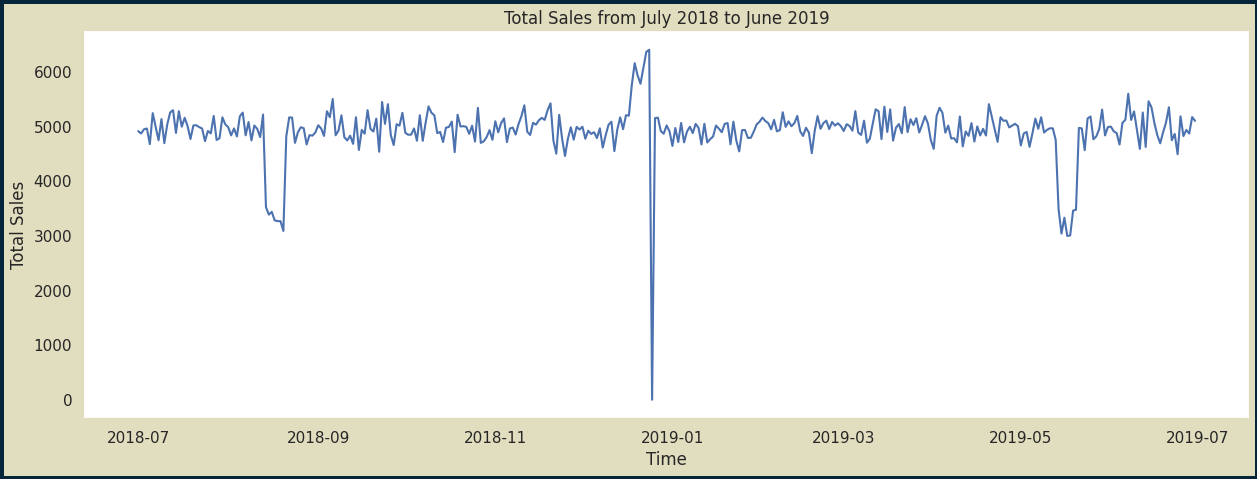

In [ ]:
timeline = z.index
graph = z['Total Sales']



fig, ax = plt.subplots(figsize = (15, 5), linewidth=5, edgecolor="#04253a", facecolor = '#e1ddbf')

ax.plot(timeline, graph)

ax.set_facecolor("#ffffff")

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

#We can see that sales spike up during the December month and zero sale on Christmas Day.

In [ ]:
# Let's look at the December month only

z_december = z[(z.index < "2019-01-01") & (z.index > "2018-11-30")]
z_december.head()

,Total Sales
Date,
2018-12-01,5000.9
2018-12-02,4781.1
2018-12-03,4927.0
2018-12-04,4869.4
2018-12-05,4900.5


Text(0.5, 1.0, 'Total Sales in December')

<Figure size 1500x500 with 0 Axes>

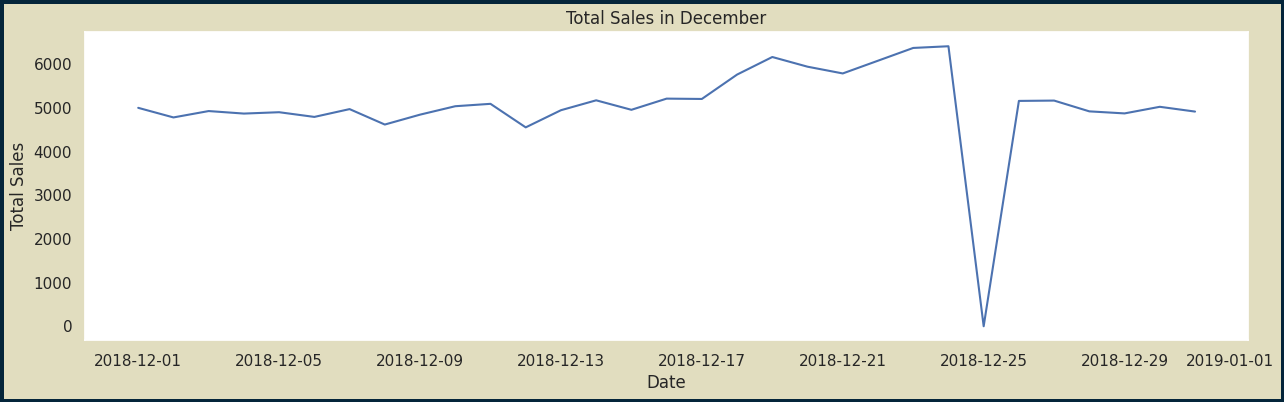

In [ ]:
plt.figure(figsize = (15, 5))
fig = plt.figure(linewidth=5, edgecolor="#04253a", facecolor = '#e1ddbf')

ax = sns.lineplot(data= z_december, x= 'Date', y = 'Total Sales')
ax.set_facecolor("#ffffff")

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')

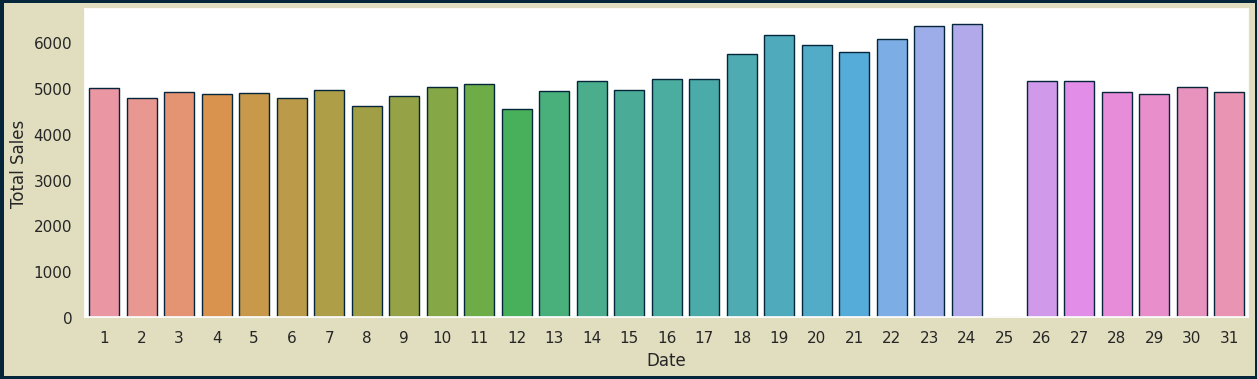

In [ ]:
# Reset index

z_december.reset_index(drop = True, inplace = True)
z_december.head()

z_december['Date'] = z_december.index + 1
z_december.head()

fig = plt.figure(linewidth=5, edgecolor="#04253a", facecolor = '#e1ddbf')

ax = sns.barplot(x = 'Date', y ='Total Sales', data = z_december,  edgecolor="#04253a")

ax.set_facecolor("#ffffff")

#Data analysis on customer segments

##1. Who spends the most on chips i.e. describing customers by lifestage and premimum category?

In [ ]:
df4

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,Brand Name,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246199,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246200,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246201,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246202,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [ ]:
df4['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     50677
RETIREES                  46342
OLDER FAMILIES            45042
YOUNG FAMILIES            40395
YOUNG SINGLES/COUPLES     33917
MIDAGE SINGLES/COUPLES    23342
NEW FAMILIES               6489
Name: LIFESTAGE, dtype: int64

In [ ]:
df4['PREMIUM_CUSTOMER'].value_counts()

Mainstream    94839
Budget        86567
Premium       64798
Name: PREMIUM_CUSTOMER, dtype: int64

<Figure size 1500x400 with 0 Axes>

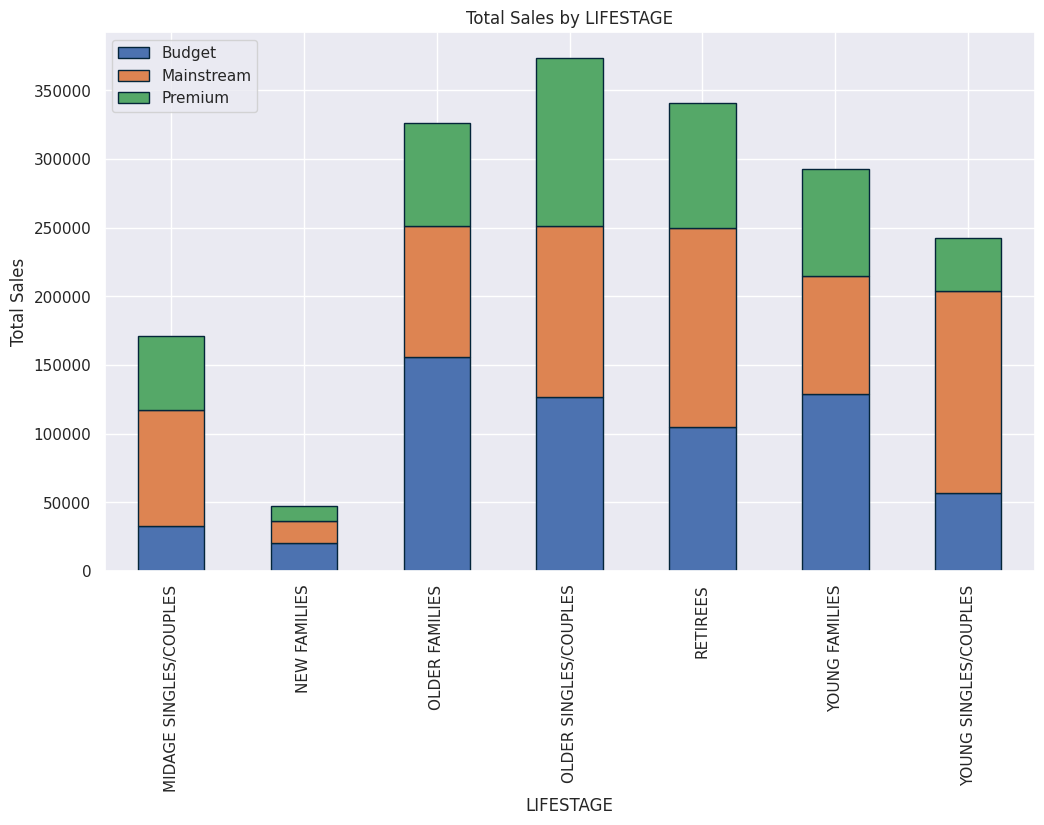

In [ ]:
df8 = pd.DataFrame(df4.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())

fig = plt.figure(linewidth=5, edgecolor="#04253a", facecolor = '#e1ddbf')

df8.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by LIFESTAGE' , edgecolor="#04253a")

plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

##2. How many customers are there in each segment?

In [ ]:
df9 = pd.DataFrame(df4.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
df9.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)

In [ ]:
df9 = df9.sort_values(by = 'Number of Customers', ascending = False).head(10)

In [ ]:
df9

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 7905
                 RETIREES                              6357
                 OLDER SINGLES/COUPLES                 4853
Budget           OLDER SINGLES/COUPLES                 4846
Premium          OLDER SINGLES/COUPLES                 4681
Budget           OLDER FAMILIES                        4606
                 RETIREES                              4382
                 YOUNG FAMILIES                        3951
Premium          RETIREES                              3811
Budget           YOUNG SINGLES/COUPLES                 3644

In [ ]:
df9 = pd.DataFrame(df4.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())

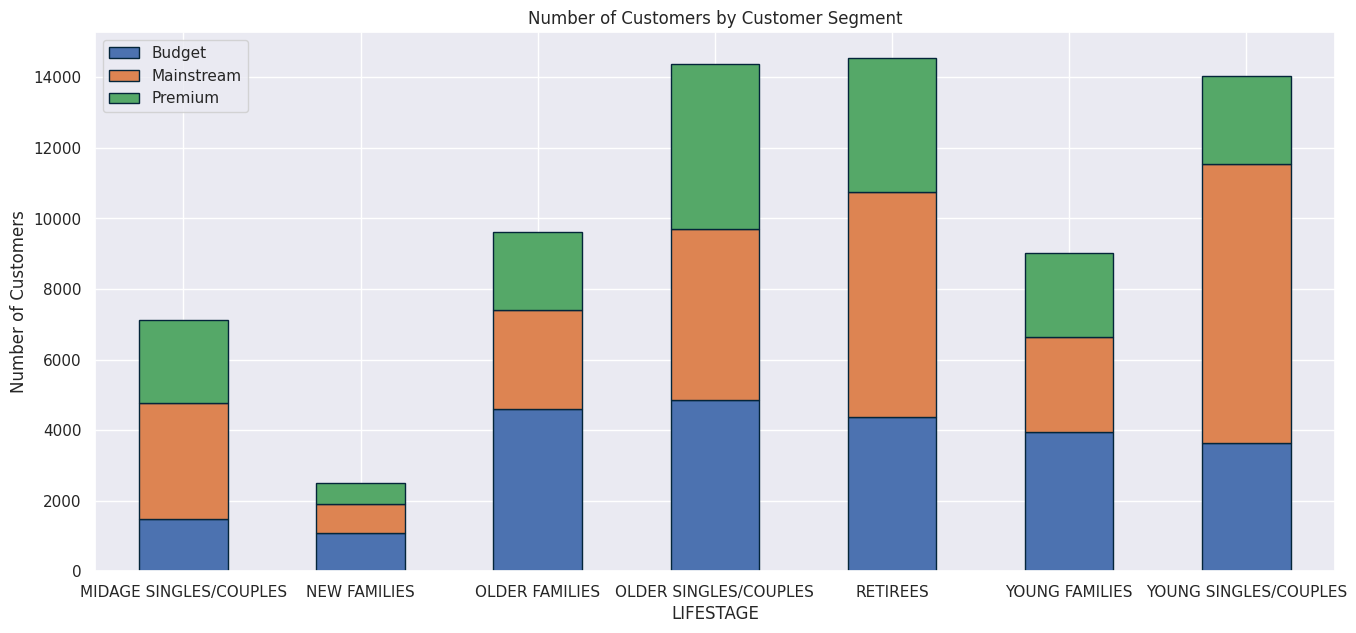

In [ ]:
df9.unstack().plot(kind='bar', stacked = True , rot=0 , figsize = (16, 7), title = 'Number of Customers by Customer Segment',  edgecolor="#04253a")
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)


##Conclusion

Budget – older families, Mainstream – young singles/couples, and Mainstream – retirees shoppers have accounted for the majority of sales.
Mainstream young singles/couples and retirees spend more money on chips than other purchasers mainly due to the fact that there are more customers in these segments.
Additionally, young, middle-aged, and mainstream individuals and couples are more inclined to pay more for each bag of chips.
They are also 23% more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population.